In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector = inspect(engine)

columns_Measure = inspector.get_columns('measurement')
for c in columns_Measure:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
session.query(Measure.id, Measure.station, Measure.date, Measure.prcp, Measure.tobs).limit(10).all()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
maxDate = session.query(func.max(Measure.date)).all()
maxDate

[('2017-08-23',)]

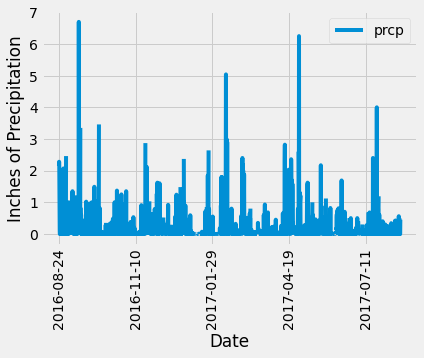

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
firstDate = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
allData = session.query(Measure.date, Measure.prcp).filter(Measure.date > firstDate).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
allData_df = pd.DataFrame(allData, columns=['date', 'prcp']).set_index('date')

# Sort the dataframe by date
allData_df = allData_df.sort_values('date')

allData_df = allData_df.reset_index()

# Use Pandas Plotting with Matplotlib to plot the data
allData_df.plot(x='date', y='prcp', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches of Precipitation')
plt.show()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
allData_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
        order_by(func.count(Measure.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measure.tobs), func.max(Measure.tobs),\
              func.avg(Measure.tobs)).filter(Measure.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

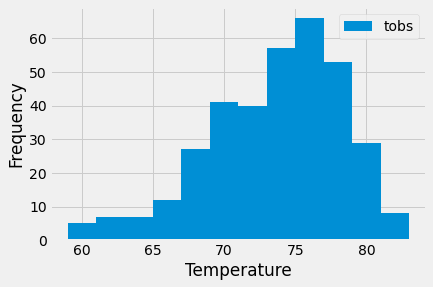

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
firstStationDate = dt.date(2017,8,23) - dt.timedelta(days=365)

stationData = session.query(Measure.tobs).filter(Measure.station == 'USC00519281').\
                filter(Measure.date >= firstStationDate).all()

stationDF = pd.DataFrame(stationData, columns=['tobs'])

stationDF.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [18]:
# Close Session
session.close()